In [1]:
import pandas as pd
import numpy as np

### Analyse et Compréhension des bases de données TES

In [5]:
data_tes = pd.read_csv(
    "data/international_TES/2013_SML.csv",
    index_col=0,
    low_memory=False
)

data_tes.head()
print(data_tes.shape)



(3468, 3928)


In [6]:
print(data_tes.index[-10:])


Index(['ROW_N', 'ROW_O', 'ROW_P', 'ROW_Q', 'ROW_R', 'ROW_S', 'ROW_T', 'TLS',
       'VA', 'OUT'],
      dtype='object', name='V1')


In [7]:
print(data_tes.columns[-20:])


Index(['USA_DPABR', 'VNM_HFCE', 'VNM_NPISH', 'VNM_GGFC', 'VNM_GFCF',
       'VNM_INVNT', 'VNM_DPABR', 'ZAF_HFCE', 'ZAF_NPISH', 'ZAF_GGFC',
       'ZAF_GFCF', 'ZAF_INVNT', 'ZAF_DPABR', 'ROW_HFCE', 'ROW_NPISH',
       'ROW_GGFC', 'ROW_GFCF', 'ROW_INVNT', 'ROW_DPABR', 'OUT'],
      dtype='object')


In [8]:
cols = data_tes.columns

fd_start = [i for i, col in enumerate(cols) if "HFCE" in col][0]

print("FD commence à la colonne :", fd_start)
print("Nom de la colonne :", cols[fd_start])


FD commence à la colonne : 3465
Nom de la colonne : ARG_HFCE


In [9]:
FD_cols = data_tes.columns[fd_start:-1]  # -1 pour exclure OUT

print("Nombre colonnes FD :", len(FD_cols))
print(FD_cols[:10])
print(FD_cols[-10:])


Nombre colonnes FD : 462
Index(['ARG_HFCE', 'ARG_NPISH', 'ARG_GGFC', 'ARG_GFCF', 'ARG_INVNT',
       'ARG_DPABR', 'AUS_HFCE', 'AUS_NPISH', 'AUS_GGFC', 'AUS_GFCF'],
      dtype='object')
Index(['ZAF_GGFC', 'ZAF_GFCF', 'ZAF_INVNT', 'ZAF_DPABR', 'ROW_HFCE',
       'ROW_NPISH', 'ROW_GGFC', 'ROW_GFCF', 'ROW_INVNT', 'ROW_DPABR'],
      dtype='object')


In [11]:
df_nace = pd.read_excel("data/international_TES/NACE 38 - 88 detaille vf.xlsx")

df_nace["NACE 17"] = df_nace["NACE 17"].ffill()
secteurs_uniques = df_nace["NACE 17"].unique()

print("Nombre de secteurs uniques :", len(secteurs_uniques))
print(sorted(secteurs_uniques))



Nombre de secteurs uniques : 18
['AZ', 'BZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'CH', 'FZ', 'GZ', 'HZ', 'IZ', 'JZ', 'KZ', 'LZ', 'MN', 'OQ', 'RU']


In [12]:
# Charger le fichier Excel
df_read = pd.read_excel("data/international_TES/ReadME_ICIO_small.xlsx")

# Afficher les premières lignes
df_read.head(100)

C:\Users\id2415\AppData\Roaming\Python\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: ColItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\id2415\AppData\Roaming\Python\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: RowItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,"OECD, Inter-Country Input-Output (ICIO) Tables",NaN
1,NaN,NaN,NaN
2,NaN,NaN,http://oe.cd/icio
3,NaN,NaN,NaN
4,NaN,Suggestions or queries can be sent to icio-tiv...,NaN
5,NaN,"When using this database, please cite as ""OECD...",NaN
6,NaN,NaN,NaN
7,NaN,NaN,"Data are expressed in current USD, million"
8,NaN,NaN,Structure
9,NaN,NaN,Reference area & economic activities


In [13]:
import pandas as pd

xls = pd.ExcelFile("data/international_TES/ReadME_ICIO_small.xlsx")
print(xls.sheet_names)


['ReadMe', 'Structure', 'Area_Activities', 'RowItems', 'ColItems']


C:\Users\id2415\AppData\Roaming\Python\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: ColItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\id2415\AppData\Roaming\Python\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: RowItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [14]:
import pandas as pd

df_area = pd.read_excel(
    "data/international_TES/ReadME_ICIO_small.xlsx",
    sheet_name="Area_Activities",
    skiprows=2)

# enlever colonnes vides éventuelles
df_area = df_area.dropna(axis=1, how="all")

df_area.head()


,V1,Code,Column1,countries,V1.1,Old code,Code.1,Industry,ISIC Rev.4
0,1,ARG,NaN,Argentina,1.0,D01T02,A01_02,"Agriculture, hunting, forestry","01, 02"
1,2,AUS,NaN,Australia,2.0,D03,A03,Fishing and aquaculture,03
2,3,AUT,NaN,Austria,3.0,D05T06,B05_06,"Mining and quarrying, energy producing products","05, 06"
3,4,BEL,NaN,Belgium,4.0,D07T08,B07_08,"Mining and quarrying, non-energy producing pro...","07, 08"
4,5,BGD,NaN,Bangladesh,5.0,D09,B09,Mining support service activities,09


In [15]:
df_area.columns

Index(['V1', 'Code', 'Column1', 'countries', 'V1.1', 'Old code', 'Code.1',
       'Industry', 'ISIC Rev.4'],
      dtype='object')

In [16]:
df_area.columns = [
    "col0",          # colonne vide
    "country_code",  # ARG, AUS, FRA...
    "col2",
    "country_name",  # Argentina, Australia...
    "col4",
    "old_code",
    "sector_code",   # A01_02, C10T12...
    "sector_name",
    "isic"
]


Extraction de la liste des pays 

In [17]:
liste_pays_code = df_area["country_code"].unique()
liste_pays = df_area["country_name"].unique()

print("Nombre de pays :", len(liste_pays_code))
print(liste_pays_code[:77])

print("Noms de pays :", len(liste_pays))
print(liste_pays[:77])


Nombre de pays : 78
['ARG' 'AUS' 'AUT' 'BEL' 'BGD' 'BGR' 'BLR' 'BRA' 'BRN' 'CAN' 'CHE' 'CHL'
 'CHN' 'CIV' 'CMR' 'COL' 'CRI' 'CYP' 'CZE' 'DEU' 'DNK' 'EGY' 'ESP' 'EST'
 'FIN' 'FRA' 'GBR' 'GRC' 'HKG' 'HRV' 'HUN' 'IDN' 'IND' 'IRL' 'ISL' 'ISR'
 'ITA' 'JOR' 'JPN' 'KAZ' 'KHM' 'KOR' 'LAO' 'LTU' 'LUX' 'LVA' 'MAR' 'MEX'
 'MLT' 'MMR' 'MYS' 'NGA' 'NLD' 'NOR' 'NZL' 'PAK' 'PER' 'PHL' 'POL' 'PRT'
 'ROU' 'RUS' 'SAU' 'SEN' 'SGP' 'SVK' 'SVN' 'SWE' 'THA' 'TUN' 'TUR' 'TWN'
 'UKR' 'USA' 'VNM' 'ZAF' 'ROW']
Noms de pays : 78
['Argentina' 'Australia' 'Austria' 'Belgium' 'Bangladesh' 'Bulgaria'
 'Belarus' 'Brazil' 'Brunei Darussalam' 'Canada' 'Switzerland' 'Chile'
 "China (People's Republic of)" "Côte d'Ivoire" 'Cameroon' 'Colombia'
 'Costa Rica' 'Cyprus (1)' 'Czechia' 'Germany' 'Denmark' 'Egypt' 'Spain'
 'Estonia' 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong, China'
 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland' 'Iceland' 'Israel (2)'
 'Italy' 'Jordan' 'Japan' 'Kazakhstan' 'Cambodia' 'Korea'
 "

In [18]:
liste_secteurs = df_area["sector_code"].unique()
liste_secteurs_name = df_area["sector_name"].unique()

print("Nombre de secteurs :", len(liste_secteurs))
print(liste_secteurs[:45])
liste_secteurs = df_area["sector_code"].unique()

print("Nombre de secteurs :", len(liste_secteurs_name))
print(liste_secteurs_name[:45])



Nombre de secteurs : 46
['A01_02' 'A03' 'B05_06' 'B07_08' 'B09' 'C10T12' 'C13T15' 'C16' 'C17_18'
 'C19' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C30'
 'C31T33' 'D' 'E' 'F' 'G' 'H49' 'H50' 'H51' 'H52' 'H53' 'I' 'J58T60' 'J61'
 'J62_63' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T']
Nombre de secteurs : 46
['Agriculture, hunting, forestry' 'Fishing and aquaculture'
 'Mining and quarrying, energy producing products'
 'Mining and quarrying, non-energy producing products'
 'Mining support service activities'
 'Food products, beverages and tobacco'
 'Textiles, textile products, leather and footwear'
 'Wood and products of wood and cork' 'Paper products and printing'
 'Coke and refined petroleum products' 'Chemical and chemical products'
 'Pharmaceuticals, medicinal chemical and botanical products'
 'Rubber and plastics products' 'Other non-metallic mineral products'
 'Basic metals' 'Fabricated metal products'
 'Computer, electronic and optical equipment' 'Electrical equipment'


In [19]:
years = range(2011, 2021)

data = {}

for year in years:
    df = pd.read_csv(
        f"data/international_TES/{year}_SML.csv",
        index_col=0,
        low_memory=False
    )
    data[year] = df


In [20]:
data[2015].head()

,ARG_A01_02,ARG_A03,ARG_B05_06,ARG_B07_08,ARG_B09,ARG_C10T12,ARG_C13T15,ARG_C16,ARG_C17_18,ARG_C19,...,ZAF_GFCF,ZAF_INVNT,ZAF_DPABR,ROW_HFCE,ROW_NPISH,ROW_GGFC,ROW_GFCF,ROW_INVNT,ROW_DPABR,OUT
V1,,,,,,,,,,,,,,,,,,,,,
ARG_A01_02,7021.3450,22.3506,3.6788,3.1605,0.0000,29534.1193,1544.6489,113.8678,98.7946,6.3076,...,1.3954,0.8413,0.0498,746.6062,0.0972,9.3747,30.6841,28.1839,4.9681,59311.9484
ARG_A03,7.9760,72.6433,0.0408,0.0007,0.0064,612.4146,0.0450,0.0020,0.1803,0.2672,...,0.0000,0.0066,0.0054,19.6399,0.0075,0.0364,0.0070,0.3486,0.5387,2235.9896
ARG_B05_06,5.3907,0.1209,360.9753,10.0700,42.5685,15.8616,2.5260,0.7495,1.7184,10825.5522,...,0.0033,0.0005,0.0003,0.4741,0.0002,0.0065,1.0814,0.8194,0.0257,21997.2584
ARG_B07_08,0.9832,0.2743,76.6361,511.8613,0.0224,111.9267,10.5371,0.0520,8.3223,139.5662,...,0.0004,0.0000,0.0000,7.7400,0.0000,0.0000,0.0924,0.2624,0.0000,6206.7158
ARG_B09,0.0000,0.0000,4252.0885,86.9235,156.7731,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1675,0.0000,0.0000,4996.7422


Debut de code 

1 - Chargement des données, filtrage pour les bases des données et extraction Z domestique (pays/zone)

In [21]:
import os
import numpy as np
import pandas as pd

FD_SUFFIXES = ["HFCE", "NPISH", "GGFC", "GFCF", "INVNT", "DPABR"]

def load_icio_year(path_csv: str) -> pd.DataFrame:
    """Charge un ICIO annuel (CSV) avec la 1ère colonne en index."""
    df = pd.read_csv(path_csv, index_col=0, low_memory=False)
    return df

def find_fd_start(columns: pd.Index) -> int:
    """Retourne l'index de la 1ère colonne de demande finale (HFCE)."""
    for i, c in enumerate(columns):
        if any(c.endswith("_" + sfx) for sfx in FD_SUFFIXES):
            return i
    raise ValueError("Impossible de trouver le début de la demande finale (HFCE...).")

def get_sector_rows(df: pd.DataFrame) -> pd.Index:
    """Garde uniquement les lignes secteurs pays (exclut TLS/VA/OUT)."""
    # Dans tes fichiers : les 3 dernières lignes sont TLS, VA, OUT
    # On les enlève si elles existent.
    drop_last = [x for x in ["TLS", "VA", "OUT"] if x in df.index]
    if drop_last:
        df_sect = df.drop(index=drop_last)
        return df_sect.index
    return df.index

def get_sector_cols(df: pd.DataFrame) -> pd.Index:
    """Retourne uniquement les colonnes secteurs (exclut FD et OUT)."""
    fd_start = find_fd_start(df.columns)
    # -1 pour exclure la colonne OUT (dernière colonne)
    return df.columns[:fd_start]

def extract_country_intermediate_matrix(df: pd.DataFrame, area_code: str) -> pd.DataFrame:
    """
    Extrait la sous-matrice Z domestique (industries x industries) pour un pays/zone.
    area_code: 'USA', 'FRA', 'DEU', 'ROW', etc.
    """
    # lignes secteurs seulement
    df_sect = df.loc[get_sector_rows(df), :]

    # colonnes secteurs seulement
    sector_cols = get_sector_cols(df)

    # sous-matrice complète Z (tous pays/secteurs)
    Z_full = df_sect[sector_cols]

    # filtre domestique: lignes et colonnes qui commencent par "USA_"
    prefix = area_code + "_"
    rows_dom = [idx for idx in Z_full.index if idx.startswith(prefix)]
    cols_dom = [col for col in Z_full.columns if col.startswith(prefix)]

    Z_dom = Z_full.loc[rows_dom, cols_dom].copy()
    return Z_dom


2. Mapping 45 secteurs ICIO → 17 NACE (matrice de passage)

In [22]:
macro_map = {
    "AZ": "Primaires & énergie",
    "BZ": "Primaires & énergie",

    "FZ": "Construction & immobilier",
    "LZ": "Construction & immobilier",

    "JZ": "Info-com",

    "GZ": "Services",
    "IZ": "Services",
    "HZ": "Services",

    "KZ": "Finance",

    "OQ": "Public & services non-marchands",
    "RU": "Public & services non-marchands",

    "MN": "Services pro",

    "C1": "Industrie",
    "C2": "Industrie",
    "C3": "Industrie",
    "C4": "Industrie",
    "C5": "Industrie",
    "CH": "Industrie",
}


In [23]:
def load_nace_mapping(path_xlsx: str) -> dict:
    m = pd.read_excel(path_xlsx)

    # Forward fill du NACE 17
    m["NACE 17"] = m["NACE 17"].ffill()

    # Nettoyage
    m["Nace 88"] = m["Nace 88"].astype(str).str.strip()
    m["NACE 17"] = m["NACE 17"].astype(str).str.strip()

    # Supprimer lignes vides
    m = m.dropna(subset=["Nace 88"])

    return dict(zip(m["Nace 88"], m["NACE 17"]))


def split_area_sector(code: str) -> tuple[str, str]:
    """
    'USA_A01_02' -> ('USA', 'A01_02')
    Attention: certains secteurs contiennent des underscores (C17_18, J62_63 etc.)
    On retire juste le préfixe pays + '_' et on garde le reste.
    """
    area, rest = code.split("_", 1)
    return area, rest

def aggregate_45_to_17(Z_dom_45: pd.DataFrame, map_45_to_17: dict) -> pd.DataFrame:
    """
    Agrège une matrice domestique (45x45, index/cols 'USA_<sec45>')
    en (17x17) selon la table de passage.
    """
    # extraire codes secteur 45
    row_sectors_45 = [split_area_sector(x)[1] for x in Z_dom_45.index]
    col_sectors_45 = [split_area_sector(x)[1] for x in Z_dom_45.columns]

    # mapper vers NACE17
    row_sec17 = [map_45_to_17.get(s, None) for s in row_sectors_45]
    col_sec17 = [map_45_to_17.get(s, None) for s in col_sectors_45]

    if any(v is None for v in row_sec17):
        missing = sorted({s for s, v in zip(row_sectors_45, row_sec17) if v is None})
        raise ValueError(f"Secteurs 45 manquants dans mapping (lignes): {missing[:15]} ...")

    if any(v is None for v in col_sec17):
        missing = sorted({s for s, v in zip(col_sectors_45, col_sec17) if v is None})
        raise ValueError(f"Secteurs 45 manquants dans mapping (colonnes): {missing[:15]} ...")

    # construire DF avec index/cols NACE17 (en gardant valeurs)
    Z_tmp = Z_dom_45.copy()
    Z_tmp.index = row_sec17
    Z_tmp.columns = col_sec17

    # agréger par somme (groupby sur index puis sur colonnes)
    Z_17 = Z_tmp.groupby(level=0).sum()
    Z_17 = Z_17.T.groupby(level=0).sum().T

    # ordonner les secteurs pour stabilité (optionnel)
    Z_17 = Z_17.sort_index().sort_index(axis=1)
    return Z_17


In [24]:
def aggregate_matrix_by_mapping(
    Z_matrix: pd.DataFrame,
    mapping_dict: dict
) -> pd.DataFrame:
    """
    Agrège une matrice carrée selon un mapping secteur -> groupe.
    Compatible avec :
      - NACE17
      - Macro-groupes personnalisés
    """

    # Vérification
    missing = sorted(set(Z_matrix.index) - set(mapping_dict.keys()))
    if missing:
        raise ValueError(f"Secteurs non mappés: {missing}")

    Z_tmp = Z_matrix.copy()

    # Remplacement index / colonnes
    Z_tmp.index = Z_tmp.index.map(mapping_dict)
    Z_tmp.columns = Z_tmp.columns.map(mapping_dict)

    # Agrégation par somme
    Z_agg = Z_tmp.groupby(level=0).sum()
    Z_agg = Z_agg.T.groupby(level=0).sum().T

    return Z_agg.sort_index().sort_index(axis=1)


3. Moyenne 2011–2020 + construction de W

In [28]:
def average_intermediate_matrix(
    data_dir: str,
    years: list[int],
    area_code: str,
    mapping_xlsx: str,
) -> pd.DataFrame:
    """
    Pour une zone (ex: 'USA'), extrait Z_dom(45x45) chaque année,
    projette en 17x17, puis moyenne sur la période.
    """
    map_45_to_17 = load_nace_mapping(mapping_xlsx)
    mats = []

    for y in years:
        path = os.path.join(data_dir, f"{y}_SML.csv")
        df_y = load_icio_year(path)
        Z_dom_45 = extract_country_intermediate_matrix(df_y, area_code)
        Z_dom_17 = aggregate_45_to_17(Z_dom_45, map_45_to_17)
        Z_dom_8 = aggregate_matrix_by_mapping(Z_dom_17,macro_map)
        mats.append(Z_dom_8)

    X_bar = sum(mats) / len(mats)
    return X_bar


def build_W_gvar(X_bar: pd.DataFrame) -> pd.DataFrame:
    """
    Construit la matrice de poids W à partir de X_bar (17x17)
    selon :
      1. Neutralisation de la diagonale
      2. Normalisation ligne par ligne
    """

    # Copie pour éviter modification in-place
    X_star = X_bar.copy()

    # 1️⃣ Neutralisation auto-dépendance
    np.fill_diagonal(X_star.values, 0.0)

    # 2️⃣ Somme des flux sortants (hors diagonale)
    row_sums = X_star.sum(axis=1)

    # Eviter division par zéro
    row_sums = row_sums.replace(0, np.nan)

    # 3️⃣ Normalisation ligne par ligne
    W = X_star.div(row_sums, axis=0)

    # Remettre les éventuels NaN à 0
    W = W.fillna(0.0)

    return W


Par Zone

In [26]:
EU_CODES = [
    "AUT","BEL","BGR","CYP","CZE","DEU","DNK","ESP","EST","FIN","FRA","GRC",
    "HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","POL","PRT","ROU",
    "SVK","SVN","SWE"
]

def average_zone_domestic(
    data_dir: str,
    years: list[int],
    area_codes: list[str],
    mapping_xlsx: str,
) -> pd.DataFrame:
    """
    Agrège une zone définie par une liste de codes pays.
    On calcule la matrice domestique 17x17 de chaque pays, puis on somme (ou moyenne).
    """
    map_45_to_17 = load_nace_mapping(mapping_xlsx)
    mats_by_year = []

    for y in years:
        path = os.path.join(data_dir, f"{y}_SML.csv")
        df_y = load_icio_year(path)

        Z_zone_17 = None
        for c in area_codes:
            Z_dom_45 = extract_country_intermediate_matrix(df_y, c)
            Z_dom_17 = aggregate_45_to_17(Z_dom_45, map_45_to_17)
            Z_zone_17 = Z_dom_17 if Z_zone_17 is None else (Z_zone_17 + Z_dom_17)

        mats_by_year.append(Z_zone_17)

    X_bar_zone = sum(mats_by_year) / len(mats_by_year)
    return X_bar_zone


In [29]:
DATA_DIR = "data/international_TES"
MAPPING_XLSX = "data/international_TES/NACE 38 - 88 detaille vf.xlsx"
YEARS = list(range(2011, 2021))

Xbar_USA = average_intermediate_matrix(
    data_dir=DATA_DIR,
    years=YEARS,
    area_code="USA",
    mapping_xlsx=MAPPING_XLSX
)

W_USA = build_W_gvar(Xbar_USA)

print(Xbar_USA.shape, W_USA.shape)     
print(W_USA.sum(axis=1).head())        # doit être ~1
print(sorted(W_USA.index))
print(len(W_USA.index))



(8, 8) (8, 8)
Construction & immobilier    1.0
Finance                      1.0
Industrie                    1.0
Info-com                     1.0
Primaires & énergie          1.0
dtype: float64
['Construction & immobilier', 'Finance', 'Industrie', 'Info-com', 'Primaires & énergie', 'Public & services non-marchands', 'Services', 'Services pro']
8


In [30]:
pip install holoviews bokeh


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
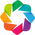

In [31]:
import holoviews as hv
from holoviews import opts
import pandas as pd

hv.extension('bokeh')

def plot_chord(matrix, threshold=0.05, title="Liens sectoriels"):

    # format long
    df_long = (
        matrix
        .reset_index()
        .melt(id_vars=matrix.index.name if matrix.index.name else "index")
    )

    df_long.columns = ["source", "target", "value"]

    # retirer diagonale
    df_long = df_long[df_long["source"] != df_long["target"]]

    # filtrer petits poids
    df_long = df_long[df_long["value"] > threshold]

    # créer liste des secteurs
    secteurs = list(matrix.index)

    nodes = pd.DataFrame({
        "index": secteurs,
        "name": secteurs
    })

    # créer chord
    chord = hv.Chord((df_long, hv.Dataset(nodes, 'index')))

    chord = chord.opts(
        opts.Chord(
            cmap='Category20',
            edge_cmap='Category20',
            labels='name',
            node_color='index',
            edge_color='source',
            edge_alpha=0.7,
            width=700,
            height=700,
            title=title
        )
    )

    return chord


In [32]:
plot_chord(W_USA)


:Chord   [source,target]   (value)

# 3. Implémentation GVAR 